#### Libraries Needed
- pandas, geopandas, plotly, dash
  - install the missing library through : `pip3 install library`
  - **The plots and interactive world maps generated using plotly and geopandas will not display if you dont have them**
  - *I would recommend installing the plotly libraries, as the interactive maps are quite fun once you can display them. They display properties such as names, and sizes upon hovering, and you can zoom into the world maps as well.* 
#### Data
- The data used is obtained from UNESCO for the purposes of the WiTH Africa data challenge as an xls file. 

In [118]:
import pandas as pd
import plotly as px
import geopandas as gp

In [206]:
data_df = pd.read_excel(r'/Users/dhruvpandit/Documents/GitHub/Projects/WiTH Africa Data Challenge/whc-sites-2021.xls')

### Data Modification
1. We drop all the columns with french text, as well as refine our search to only countries in Africa. 
2. We drop redundant columns, and only keep those that we might find interesting for the purposes of our EDA. 
3. We also create dummy columns for the categories. 

In [207]:
data_df.drop(data_df.loc[:, data_df.columns.str.endswith('_fr')].columns, axis=1, inplace=True)
data_df = data_df[data_df['region_en'] == 'Africa']
data_df_transformed = data_df[['rev_bis', 'name_en', 'short_description_en',
       'justification_en', 'date_inscribed', 'secondary_dates', 'danger',
       'date_end', 'danger_list', 'longitude', 'latitude', 'area_hectares',
       'category', 'category_short', 'states_name_en']]
data_df_transformed = pd.concat([data_df_transformed, pd.get_dummies(data_df_transformed['category'])], axis = 1)
data_df_transformed.loc[data_df_transformed['area_hectares']==0, 'area_hectares'] = 1

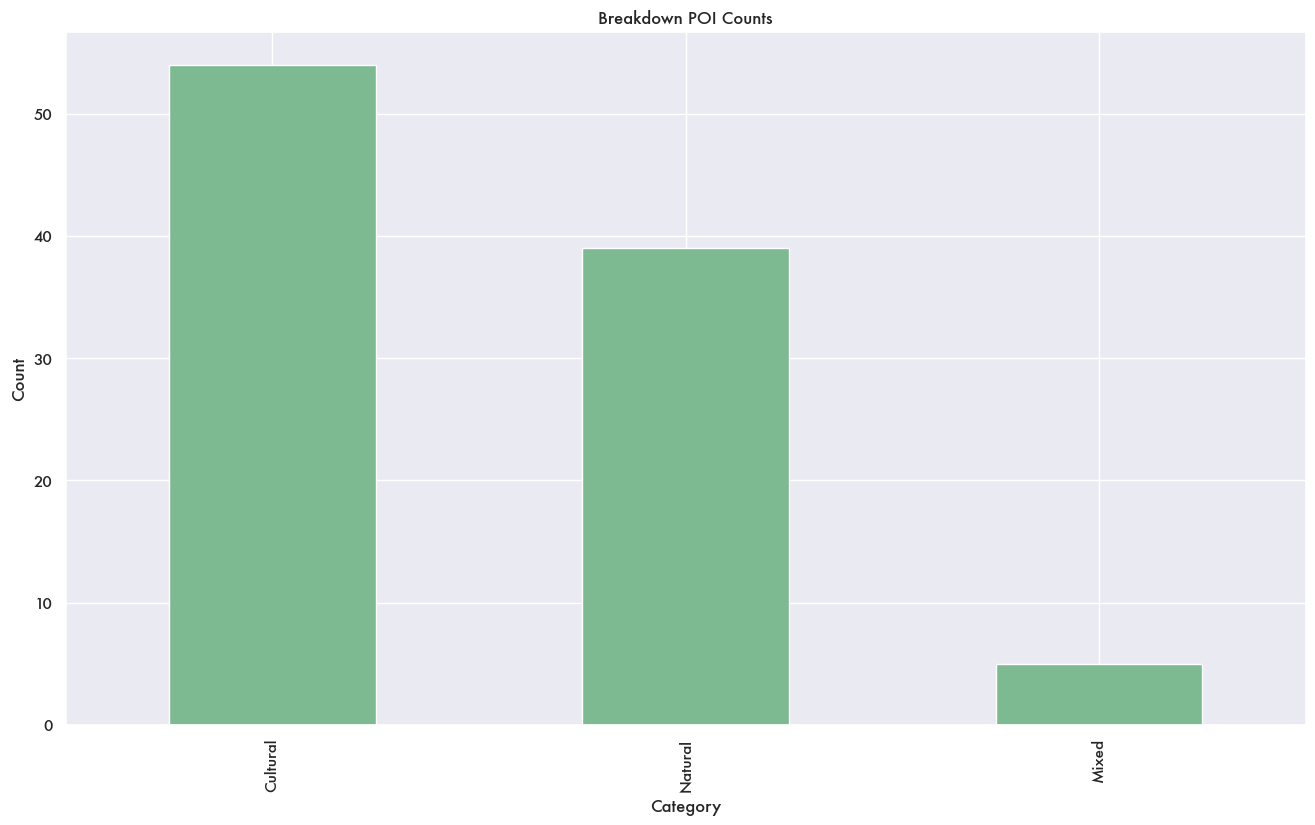

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style='darkgrid',font = 'Futura')
sns.set_palette("crest")
ax = data_df_transformed['category'].value_counts().plot(kind='bar')
ax.set(title='Breakdown POI Counts', xlabel='Category', ylabel='Count')
plt.show()


#### Output Static Image (if you do not have the libraries installed)
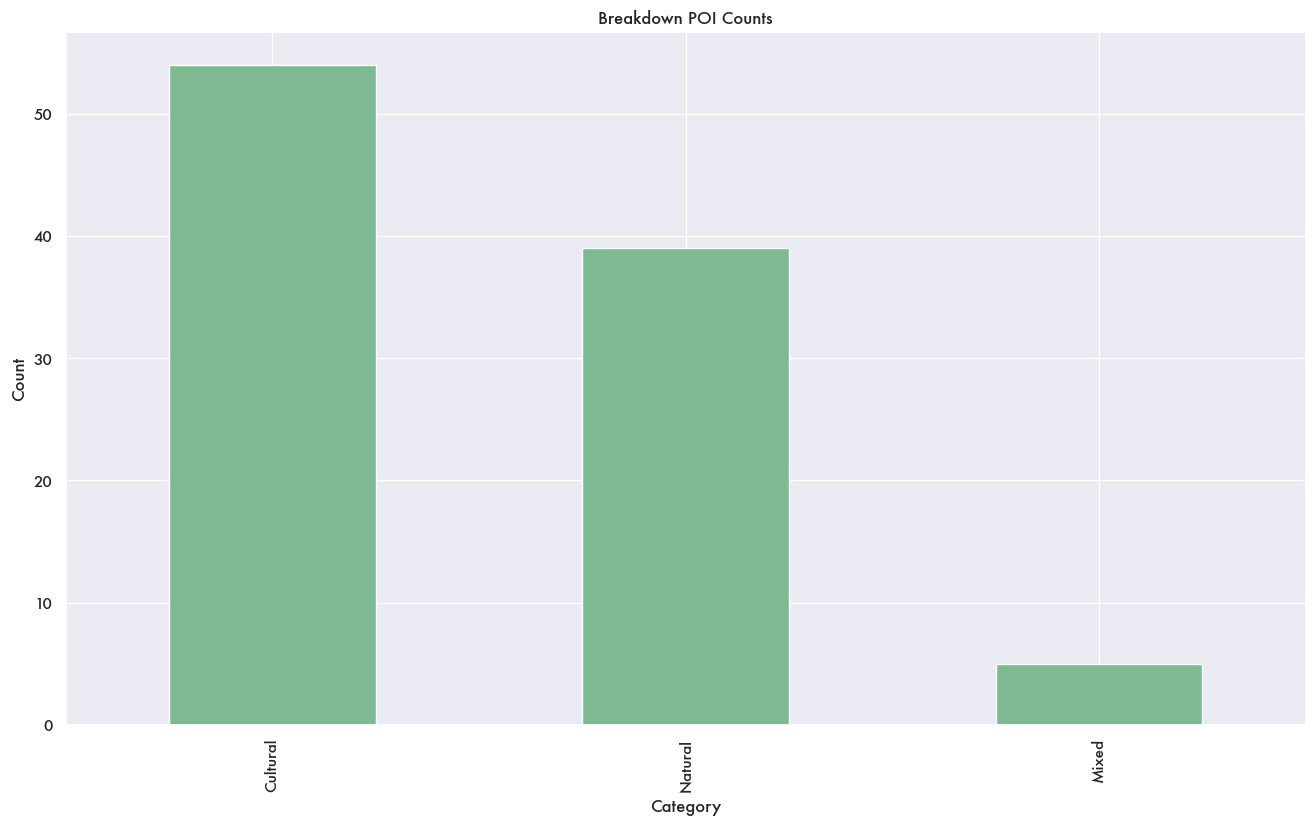

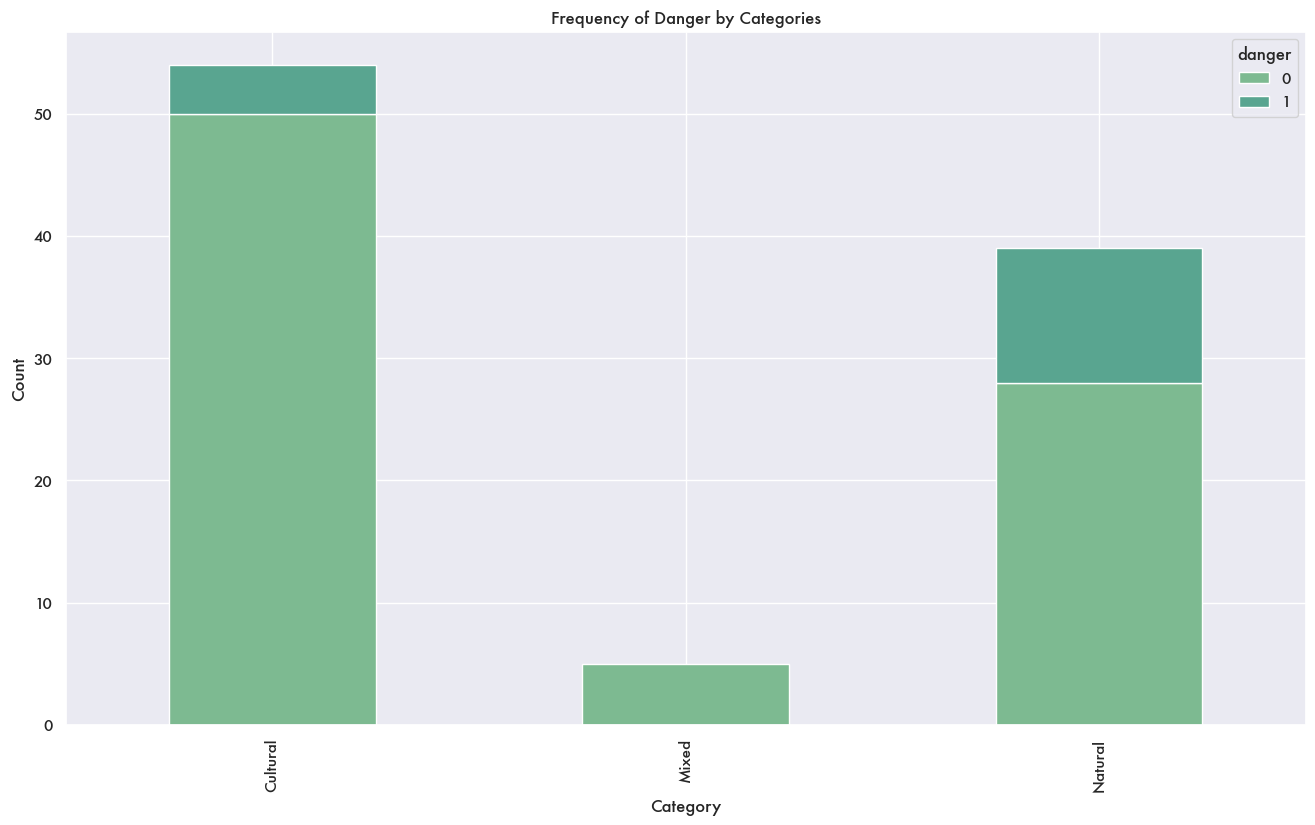

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

df = data_df_transformed.groupby(['category', 'danger'])['states_name_en'].count().unstack()

sns.set(style='darkgrid',font = 'Futura')
sns.set_palette("crest")
ax = df.plot(kind='bar', stacked=True)
ax.set(title='Frequency of Danger by Categories', xlabel='Category', ylabel='Count')
plt.show()


#### Output Static Image (if you do not have the libraries installed)
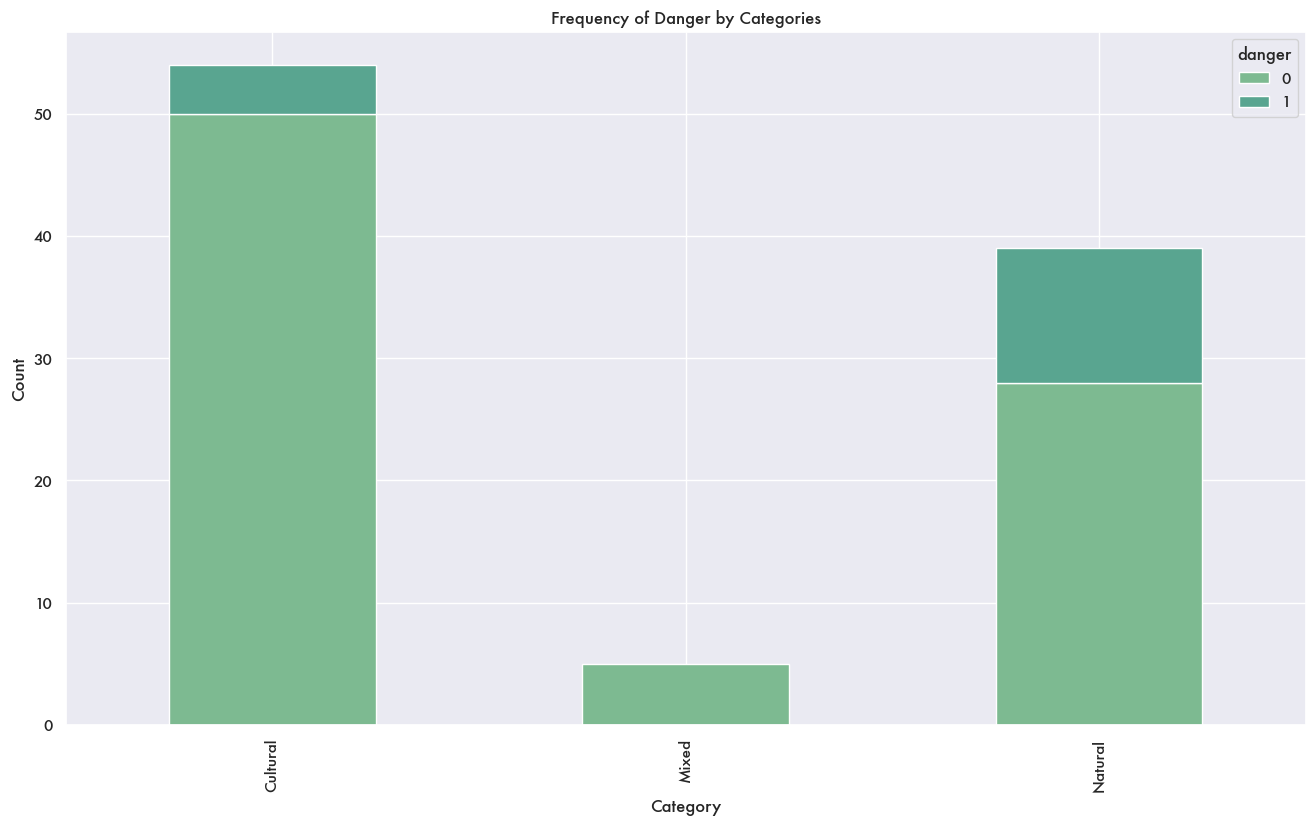

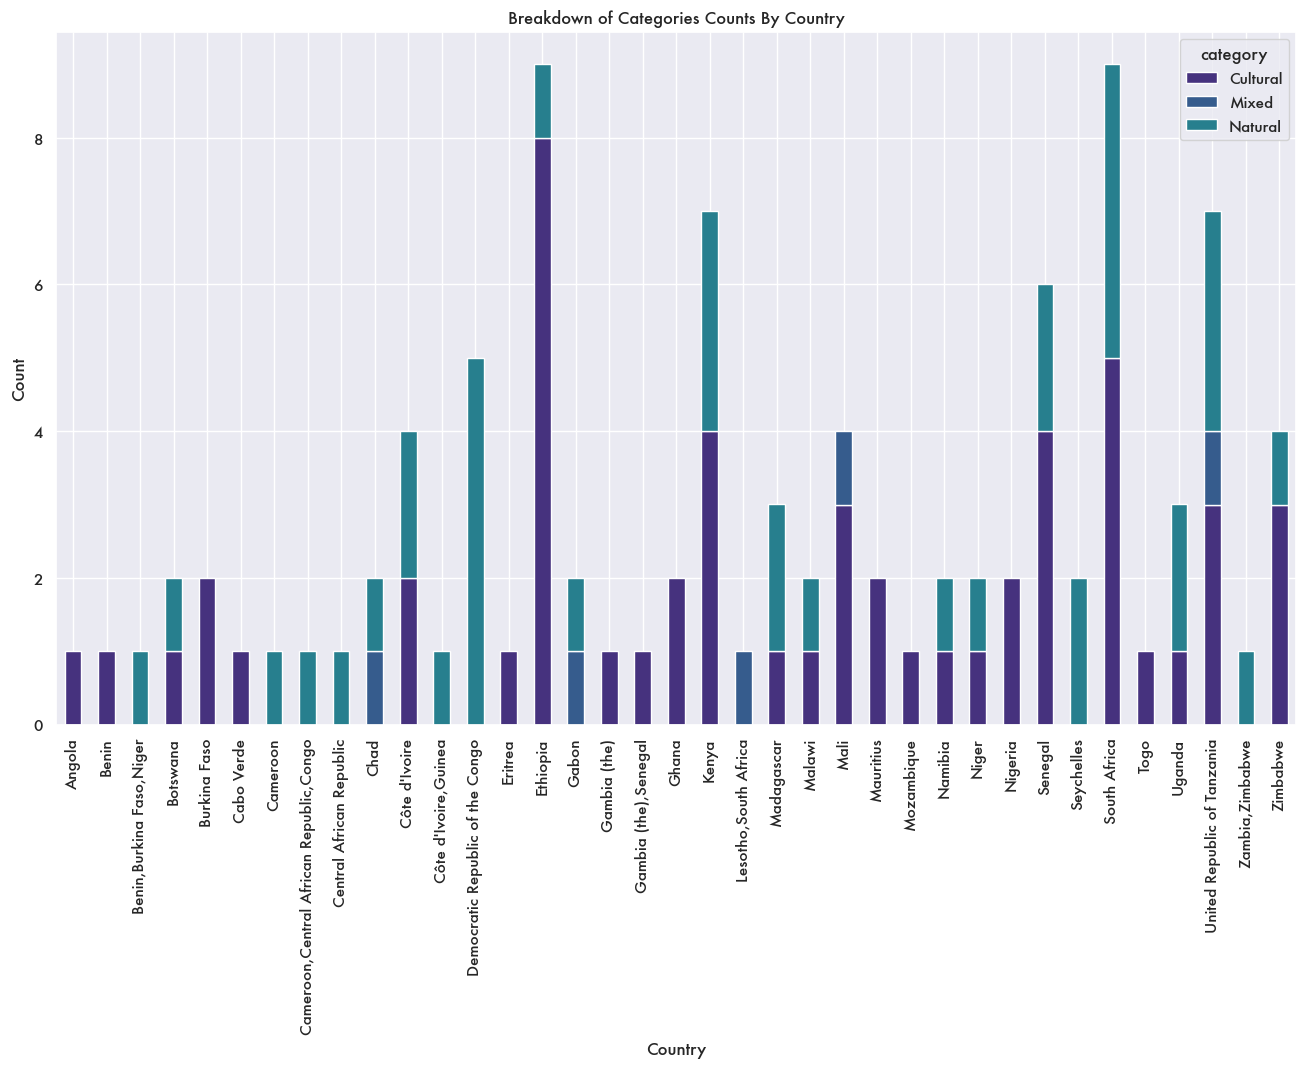

In [123]:
import seaborn as sns

df = data_df_transformed.groupby(['states_name_en', 'category'])['states_name_en'].count().unstack()
sns.set(rc={'figure.facecolor':'white', 'figure.figsize':(16,9)})
sns.set(style='darkgrid',font = 'Futura')
sns.set_palette("viridis")

ax = df.plot(kind='bar', stacked=True)
ax.set(title='Breakdown of Categories Counts By Country', xlabel='Country', ylabel='Count')

plt.show()


#### Output Static Image (if you do not have the libraries installed)
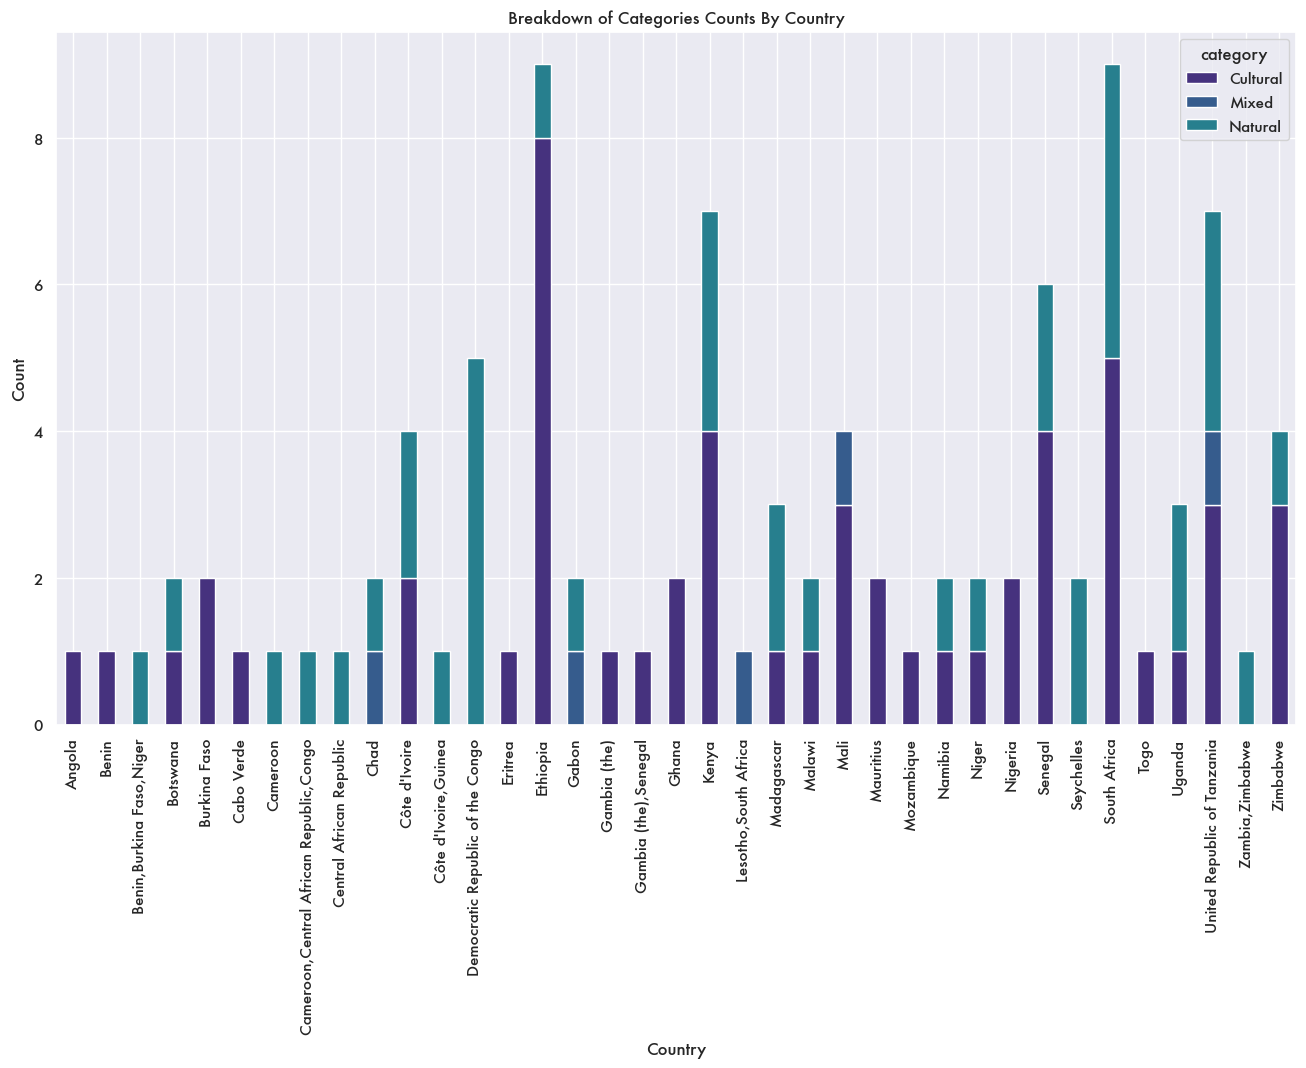

### POI Locations In Africa
- This is an interactive geopandas plot that shows the locations of each POI on a world map. 

In [124]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# create a pandas dataframe with latitude and longitude columns
df = data_df_transformed
# create a list of Point objects from the latitude and longitude columns
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]

# create a geodataframe from the dataframe and the geometry list
gdf2 = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# print the resulting geodataframe
gdf2.explore(column='category', cmap='Set1',  legend=True)

### Where are the POI located, and what is their comparative size?
- Here we have an interactive map of the places of interest. 
- Each POI is color coded according to the category it falls under. 
  - Further, the size of the POI, given by the area_hectares column is visually demonstrated through the radius of the circle. 

In [251]:
import plotly.express as px
# create an interactive world map using Plotly
fig = px.scatter_mapbox(data_df_transformed_c, lat='latitude', lon='longitude', hover_name='name_en', size='area_hectares', size_max=25,
                        zoom=1,  color='category', color_discrete_sequence=px.colors.qualitative.Pastel,
                        hover_data={'area_hectares': True}, width=950)

# update the mapbox style to 'open-street-map'
fig.update_layout(mapbox_style='carto-positron', margin = {"t":45, "b":25, "l":25},)
fig.update_layout(title={
    'text': "Plot Of POI in Africa With Their Size In Bubbles (Not To Scale)",
    'font': {'family': "Futura", 'size': 24},
    'x': 0.5,
    'y': 0.97,
    'xanchor': 'center',
    'yanchor': 'top'
})

fig.update_layout(
    legend=dict(
        title=dict(text='Categories', font=dict(family='Futura', size=20, color='Gray')),
        font=dict(family='Futura', size=16, color='Gray')
    )
)

fig.update_traces(marker_sizemin=3)
# show the map
fig.show()

#### Output Static Image (if you do not have the libraries installed)
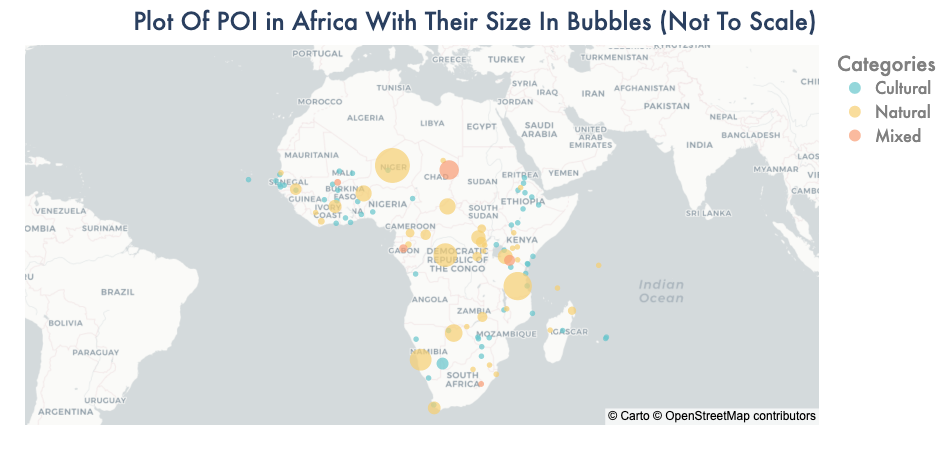

In [225]:
# create new dataframe to group the count of categories for each country
agg_df = data_df_transformed.groupby(['states_name_en', 'category']).size().unstack(fill_value=0)

In [248]:

fig = px.choropleth(agg_df, locations=agg_df.index, locationmode='country names', color='Cultural'
                    , scope='africa'
                    )
fig.update_layout(margin = {"t":45, "b":25, "l":25},)

fig.update_layout(
    font_family='Futura',
    title={
        'text': 'Number Of Cultural POIs Per Country',
        'font': {
            'size': 24,
            'color': 'Black'
        },
        'x': 0.5,
        'xanchor': 'center'
    }
)


fig.show()

#### Output Static Image (if you do not have the libraries installed)
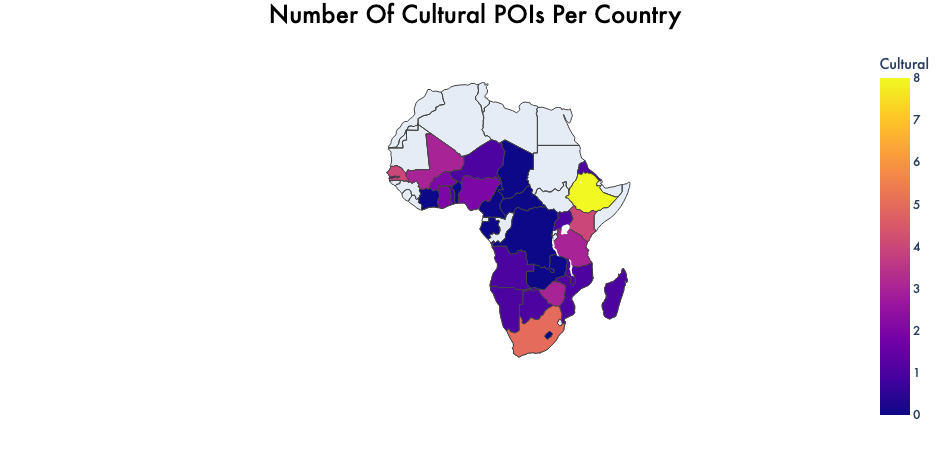

In [247]:

fig = px.choropleth(agg_df, locations=agg_df.index, locationmode='country names', color='Natural'
                    , scope='africa'
                    )
fig.update_layout(margin = {"t":45, "b":25, "l":25},)
fig.update_layout(
    font_family='Futura',
    title={
        'text': 'Number Of Natural POIs Per Country',
        'font': {
            'size': 24,
            'color': 'Black'
        },
        'x': 0.5,
        'xanchor': 'center'
    }
)


fig.show()

#### Output Static Image (if you do not have the libraries installed)
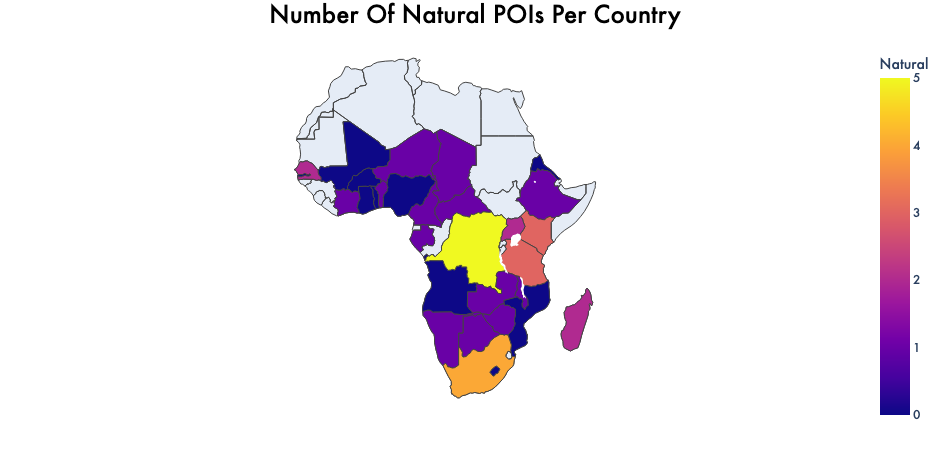

In [250]:

fig = px.choropleth(agg_df, locations=agg_df.index, locationmode='country names', color='Mixed'
                    , scope='africa'
                    )
fig.update_layout(margin = {"t":45, "b":25, "l":25},)
fig.update_layout(
    font_family='Futura',
    title={
        'text': 'Number Of Mixed POIs Per Country',
        'font': {
            'size': 24,
            'color': 'Black'
        },
        'x': 0.5,
        'xanchor': 'center'
    }
)


fig.show()

#### Output Static Image (if you do not have the libraries installed)
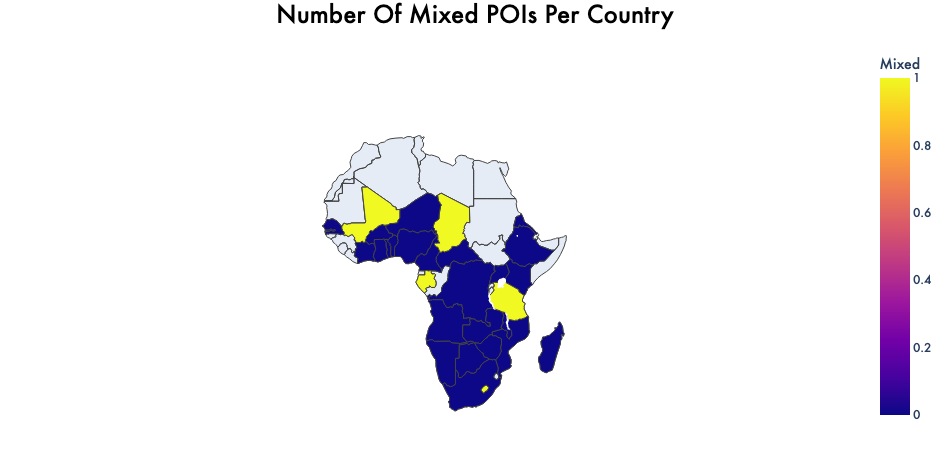

In [255]:

fig = px.choropleth(data_df_transformed, locations='states_name_en', locationmode='country names', color='danger'
                    , scope='africa'
                    )
fig.update_layout(margin = {"t":45, "b":25, "l":25},)
fig.update_layout(
    font_family='Futura',
    title={
        'text': 'Level Of Danger',
        'font': {
            'size': 24,
            'color': 'Black'
        },
        'x': 0.5,
        'xanchor': 'center'
    }
)


fig.show()

#### Output Static Image (if you do not have the libraries installed)
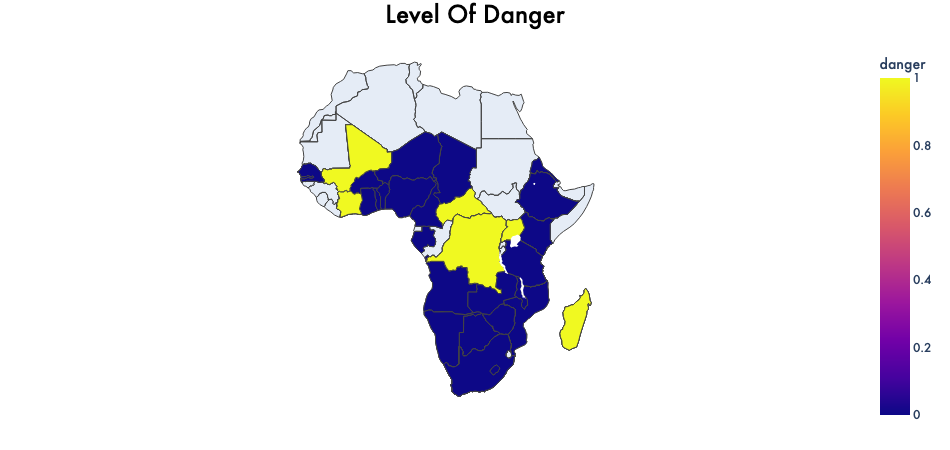

### Visual Breakdown of the POI Categories by Country

In [167]:
# create the density heatmap chart
fig = px.density_heatmap(data_df_transformed, x="category", y="states_name_en", height=1000)

# update the font of all items in the layout
fig.update_layout(
    font_family='Futura',
    title={
        'text': 'Density Heatmap',
        'font': {
            'size': 24,
            'color': 'Black'
        },
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Category',
    yaxis_title='Country'
)


# display the chart
fig.show()


#### Output Static Image (if you do not have the libraries installed)
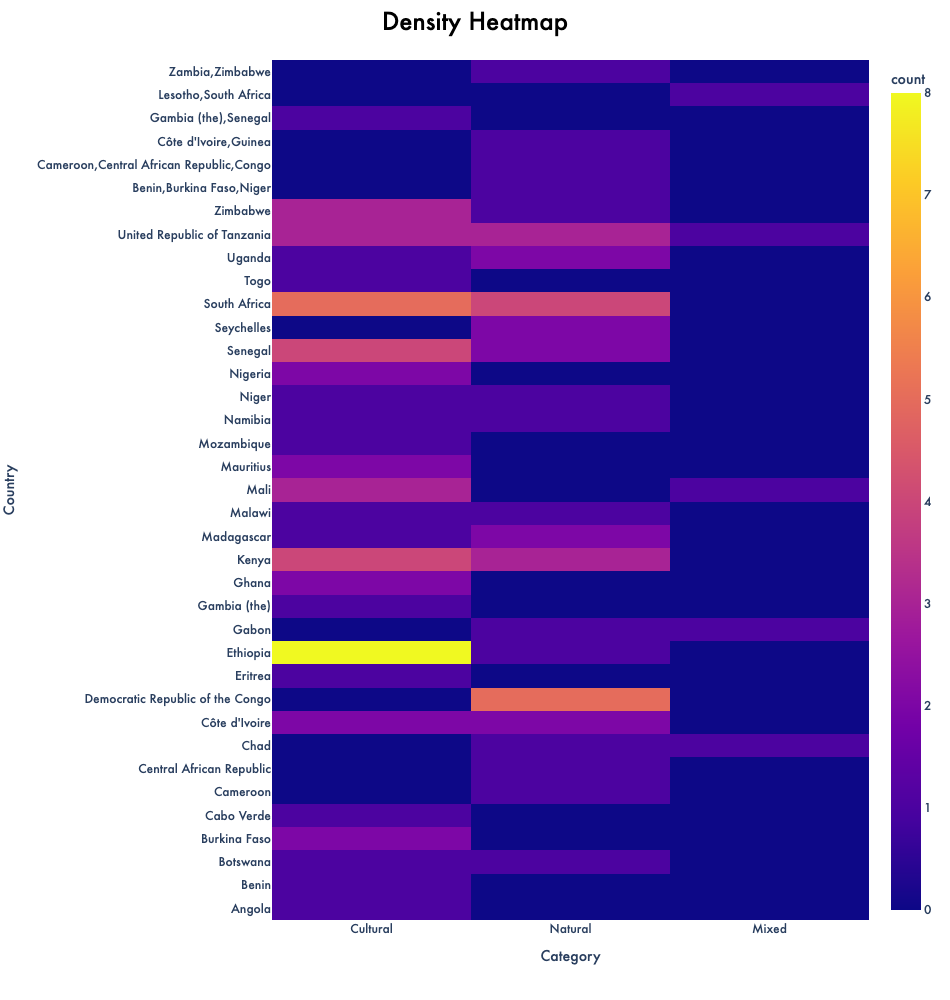